### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

#### Variable definitions

"The independent variable is the variable that is changed or controlled in a scientific experiment to test the effects on the dependent variable."
[source](http://bit.ly/2IsEkaP)

In the Stroop effect experiment, the **independant variable** is the color of the fonts in which the color words are written (this is the variable that is 'changed' in the scientific experiment), and the **dependant variable** is the reaction time recorded for each user between seeing and reading the word (the effects on this time are what we are interested in).
[source](http://bit.ly/2IqBqTP)

Let the **independant variable** be either:
<ul>
<li>`sameCol` for *same* color text and ink</li>
<li>`diffCol` for *different* color text and ink</li>
</ul>

And let the **dependant variable** be either:
<ul>
<li>`congruentTime` for time to see and then read `sameCol`</li>
<li>`incongruentTime` for time to see and then read `diffCol`</li>
</ul>


(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

To define the base hypotheses for this question, let's consider (1) the variables, (2) the data and (3) the pertinance of the answer:

<ol>
<li>**the variables:** as defined above, we have `sameCol`, `diffCol`, `congruentTime` and `incongruentTime` variables available, these must be considered in the base hypotheses</li>
<li>**the data:** the data available represent a complete population for this experiment and are split between `congruentTime` data (see-read times for the `sameCol` case) and `incongruentTime` data (see-read times for the `diffCOl` case)</li>
<li>**the pertinence of the answer:** we are interested in knowing whether it takes longer to read incongruent data than congruent data, and therefore whether our brains process the information strictly from a semantic perspective or whether visual effects also affect our textual information processing.</li>
</ol>

In order to try and avoid a pre-existing bias, let the null and alternative hypotheses be defined as follows:

In the **null hypothesis**: average reading times between 'see' and 'read' *will not be* longer for the incongruent data than for the congruent data - i.e. people on average *do not take* more time to read color words as a function of the ink used - our brains function on a solely semantic level for reading textual information.

In the **alternative hypothesis**: average reading times between 'see' and 'read' *will be* longer for the incongruent data that for the congruent data - i.e. people on average *do take* more time to read color words as a function of the ink used - our brains function on a more complex level read textual information, and process not only the words written, but also their color.

Formally:

$$H_0: congruentTime_{mean} - incongruentTime_{mean} \geq 0$$
$$H_1: congruentTime_{mean} - incongruentTime_{mean} < 0$$

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [184]:
# import libraries
import pandas as pd
import numpy as np
import math
import statistics as stats
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [185]:
# import data
df_raw = pd.read_csv('./stroopdata.csv')

In [186]:
# check data
df_raw.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [187]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [188]:
df_raw.nunique()

Congruent      24
Incongruent    24
dtype: int64

In [189]:
df_raw[df_raw.isnull() == True].count()

Congruent      0
Incongruent    0
dtype: int64

In [190]:
# descriptive statistics of congruent data
# length, min, max
len_congruent = len(df_raw['Congruent'])
min_congruent = min(df_raw['Congruent'])
max_congruent = max(df_raw['Congruent'])
# measures of central tendency
# mean (average of values), median (middle of sorted list)
mean_congruent = np.mean(df_raw['Congruent'])
median_congruent = stats.median(df_raw['Congruent'])
# measures of variabilty
# range
range_congruent = max_congruent - min_congruent
# percentiles
first_percentile_congruent = np.percentile(df_raw['Congruent'], 25)
second_percentile_congruent = np.percentile(df_raw['Congruent'], 50)
third_percentile_congruent = np.percentile(df_raw['Congruent'], 75)
# inter-quartile-range (IQR)
IQR_congruent = third_percentile_congruent - first_percentile_congruent
# variance and std (complete population, ddof = 0)
variance_pop_congruent = np.var(df_raw['Congruent'], ddof=0)
std_pop_congruent = np.std(df_raw['Congruent'], ddof=0)
# output list of results
congruent_stats = [len_congruent, min_congruent, max_congruent
                   , mean_congruent, median_congruent, range_congruent
                   , first_percentile_congruent, second_percentile_congruent
                   , third_percentile_congruent, IQR_congruent
                   , variance_pop_congruent, std_pop_congruent]

In [191]:
# descriptive statistics of incongruent data
# length, min, max
len_incongruent = len(df_raw['Incongruent'])
min_incongruent = min(df_raw['Incongruent'])
max_incongruent = max(df_raw['Incongruent'])
# measures of central tendency
# mean (average of values), median (middle of sorted list)
mean_incongruent = np.mean(df_raw['Incongruent'])
median_incongruent = stats.median(df_raw['Incongruent'])
# measures of variabilty
# range
range_incongruent = max_incongruent - min_incongruent
# percentiles
first_percentile_incongruent = np.percentile(df_raw['Incongruent'], 25)
second_percentile_incongruent = np.percentile(df_raw['Incongruent'], 50)
third_percentile_incongruent = np.percentile(df_raw['Incongruent'], 75)
# inter-quartile-range (IQR)
IQR_incongruent = third_percentile_incongruent - first_percentile_incongruent
# variance and std (complete population, ddof = 0)
variance_pop_incongruent = np.var(df_raw['Incongruent'], ddof=0)
std_pop_incongruent = np.std(df_raw['Incongruent'], ddof=0)
incongruent_stats = [len_incongruent, min_incongruent, max_incongruent
                   , mean_incongruent, median_incongruent, range_incongruent
                   , first_percentile_incongruent, second_percentile_incongruent
                   , third_percentile_incongruent, IQR_incongruent
                   , variance_pop_incongruent, std_pop_incongruent]

In [192]:
# descriptive statistics summary table
columns = ['Congruent', 'Incongruent']
descriptive_stats_dict = {columns[0]: congruent_stats, columns[1]: incongruent_stats}
descriptive_stats_index = ['length', 'min', 'max', 'mean', 'median', 'range'
                           , 'first_percentile', 'second_percentile', 'third_percentile'
                           , 'IQR', 'variance_pop', 'std_pop']
df_descriptive_stats = pd.DataFrame(descriptive_stats_dict, index=descriptive_stats_index)
df_descriptive_stats

,Congruent,Incongruent
length,24.000000,24.000000
min,8.630000,15.687000
max,22.328000,35.255000
mean,14.051125,22.015917
median,14.356500,21.017500
range,13.698000,19.568000
first_percentile,11.895250,18.716750
second_percentile,14.356500,21.017500
third_percentile,16.200750,24.051500
IQR,4.305500,5.334750


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

In [195]:
# Simulate normal distribution from mean and standard deviations calculated from data then compare to real data
mu_congruent, sigma_congruent = mean_congruent, std_pop_congruent
mu_incongruent, sigma_incongruent = mean_incongruent, std_pop_incongruent
simulated_congruent = np.random.normal(mu_congruent, sigma_congruent, 1000)
simulated_incongruent = np.random.normal(mu_incongruent, sigma_incongruent, 1000)

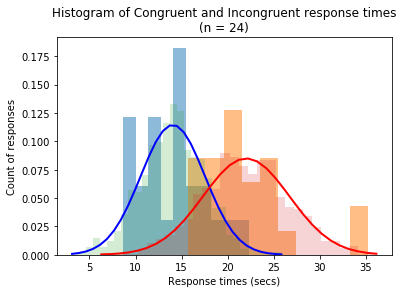

In [215]:
# using matplotlib
data = pd.DataFrame(df_raw, columns=columns)
for col in columns:
    plt.hist(data[col], density=True, alpha=0.5)
plt.title('Histogram of Congruent and Incongruent response times\n(n = 24)')
plt.xlabel('Response times (secs)')
plt.ylabel('Count of responses')
count, bins, ignored = plt.hist(simulated_congruent, 30, normed=True, alpha=0.2)
plt.plot(bins, 1/(sigma_congruent * np.sqrt(2 * np.pi)) 
         * np.exp( - (bins - mu_congruent)**2 / (2 * sigma_congruent**2) )
         ,linewidth=2, color='b')

count, bins, ignored = plt.hist(simulated_incongruent, 30, normed=True, alpha=0.2)
plt.plot(bins, 1/(sigma_incongruent * np.sqrt(2 * np.pi)) 
         * np.exp( - (bins - mu_incongruent)**2 / (2 * sigma_incongruent**2) )
         ,linewidth=2, color='r')

normalDistributionCongruent = np.random.normal(loc=mean_congruent, scale=std_pop_congruent);

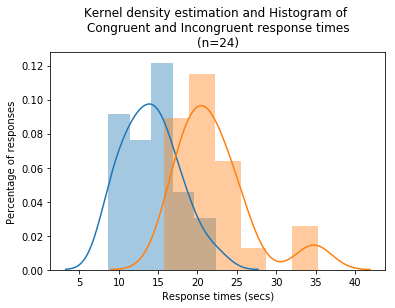

In [194]:
# using seaborn
sns.distplot(data['Congruent'])
sns.distplot(data['Incongruent'])
plt.title('Kernel density estimation and Histogram of \nCongruent and Incongruent response times\n(n=24)')
plt.xlabel('Response times (secs)')
plt.ylabel('Percentage of responses');

#### Comments about visualizations

First it should be noted that **no conclusions** are drawn from the visualizations, conclusions **will only be drawn from the statistical tests shown below.**

It can however be noted that distributions of response times for both `Congruent` and `Incongruent` data show a normal or close-to normal distribution (the `Incongruent` dataset shows a possible bimodal distribution in the KDE plot but this is only based on 2 user responses)

Interestingly, the `Incongruent` data are shifted to the right on the x-axis (Response time (secs)) relative to the `Congruent` data, this is also seen of course in the 'descriptive statistics summary table' (`df_descriptive_stats`) by comparing the `mean` or `median` values for both columns for example.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [164]:
# Perform the statistical test here

--write answer here--

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

### References

<ul>
<li>[pandas](http://pandas.pydata.org/pandas-docs/stable/)</li>
<li>[NumPy](http://www.numpy.org/)</li>
<li>[SciPy](https://scipy.org/)</li>
<li>[anaconda](https://www.anaconda.com/)</li>
<li>[jupyter notebooks](http://jupyter.org/)</li>
<li>[seaborn](https://seaborn.pydata.org/)</li>
<li>[Visualization with Seaborn](http://bit.ly/2rRgzmH)</li>
<li>[stackoverflow](https://stackoverflow.com/)</li>
<li hidden>[]()</li>
</ul>